# Visualisations and familiarizations

This file contains our data visualisations, cleaning of the data and some
familiarizations to find relationships between columns.

In [13]:
# Put the imports here, this makes it easy to create a requirements.txt file
# later, which can be used by whoever is grading us to install everything!
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [4]:
with open('./data/alzheimers_disease_data.csv', 'r') as f:
    lines = f.readlines()

header = lines[0].strip().split(',')
data = {column: [] for column in header}
for line in lines[1:]:
    values = line.strip().split(',')
    for i, value in enumerate(values):
        try:
            num = float(value)
            num = int(num) if num.is_integer() else num
            data[header[i]].append(num)
        except ValueError:
            data[header[i]].append(value)

# Accessing data (per column) can be done in the following way:
column = data['PatientID']
print(column[:5] + ['...'])

# To see all column names:
print(list(data.keys())[:5] + ['...'])

[4751, 4752, 4753, 4754, 4755, '...']
['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', '...']


## Internal and external factors

The dataset contains all sorts of different metrics for a patient. These metrics can be divided into three categories:
- Metadata: `PatientID`, `Diagnosis` and `DoctorInCharge` (since this one is just the same value everywhere)
- Internal factors: `Age`, `Gender`, `Ethnicity`, `BMI`, `FamilyHistoryAlzheimers`, `CardiovascularDisease`, `Diabetes`, `Depression`, `Hypertension`, `SystolicBP`, `DiastolicBP`, `CholesterolTotal`, `CholesterolLDL`, `CholesterolHDL`, `CholesterolTriglycerides`, `MMSE`, `FunctionalAssessment`, `MemoryComplaints`, `BehavioralProblems`, `ADL`, `Confusion`, `Disorientation`, `PersonalityChanges`, `DifficultyCompletingTasks` and `Forgetfulness`
- External factors: `EducationLevel`, `Smoking`, `AlcoholConsumption`, `PhysicalActivity`, `DietQuality` and `SleepQuality`

The metadata is not important for the tests and experiments on the data, as this says nothing about the condition of the patient. The only column here that is important is `Diagnosis`, as it tells us whether or not a patient actually has Alzheimer's disease. This is, for example, the target vector we can use for a regression model.

The internal and external factors can be examined, since these actually tell us something about the health of the patient. These could have an effect on whether or not someone has Alzheimer's disease and therefore they can be used to, for example, make predictions.

In [4]:
# Split the dataset into the three categories described above:
metadata_keys = ["PatientID", "Diagnosis", "DoctorInCharge"]
internal_factors_keys = [
    "Age", "Gender", "Ethnicity", "BMI", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "Hypertension",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment",
    "MemoryComplaints", "BehavioralProblems", "ADL", "Confusion",
    "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks",
    "Forgetfulness", "HeadInjury"
]
external_factors_keys = ["EducationLevel", "Smoking", "AlcoholConsumption",
                         "PhysicalActivity", "DietQuality", "SleepQuality"]

metadata = {key: data[key] for key in metadata_keys if key in data}
internal_factors = {key: data[key] for key in internal_factors_keys if key in data}
external_factors = {key: data[key] for key in external_factors_keys if key in data}

print("Metadata:", list(metadata.keys()))
print("Internal Factors:", list(internal_factors.keys()))
print("External Factors:", list(external_factors.keys()))

Metadata: ['PatientID', 'Diagnosis', 'DoctorInCharge']
Internal Factors: ['Age', 'Gender', 'Ethnicity', 'BMI', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'HeadInjury']
External Factors: ['EducationLevel', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']


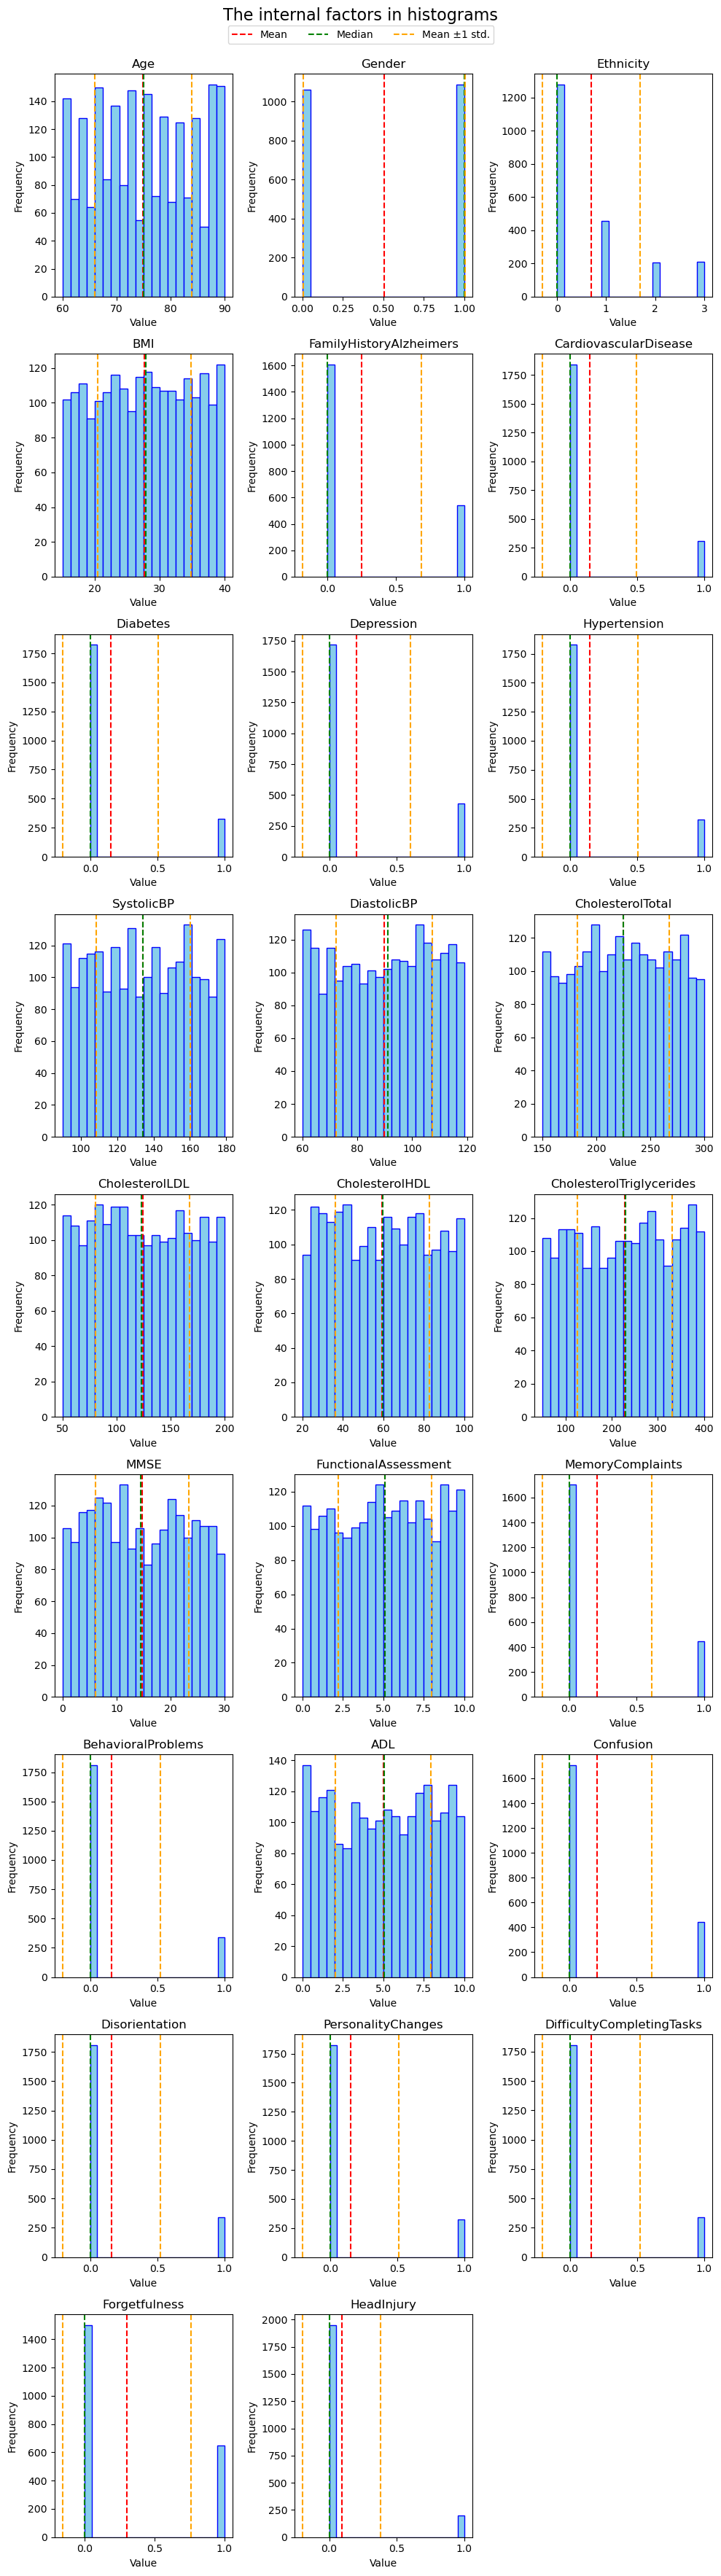

In [18]:
# Plot the internal factors into an image with two columns
num_plots = len(internal_factors)
columns = 3
rows = (num_plots + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(10, rows * 4))
fig.suptitle('The internal factors in histograms', fontsize=16)
axes = axes.flatten()

mean_line = Line2D([0], [0], color='red', linestyle='dashed', label='Mean')
median_line = Line2D([0], [0], color='green', linestyle='dashed', label='Median')
std_line = Line2D([0], [0], color='orange', linestyle='dashed', label='Mean ±1 std.')

for i, (key, values) in enumerate(internal_factors.items()):
    axes[i].hist(values, bins=20, color='skyblue', edgecolor='blue')
    mean = np.mean(values)
    std = np.std(values)
    median = np.median(values)

    axes[i].axvline(mean, color='red', linestyle='dashed')
    axes[i].axvline(median, color='green', linestyle='dashed')
    axes[i].axvline(mean + std, color='orange', linestyle='dashed')
    axes[i].axvline(mean - std, color='orange', linestyle='dashed')

    axes[i].set_title(key)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.legend(handles=[mean_line, median_line, std_line], loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 0.975))

plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

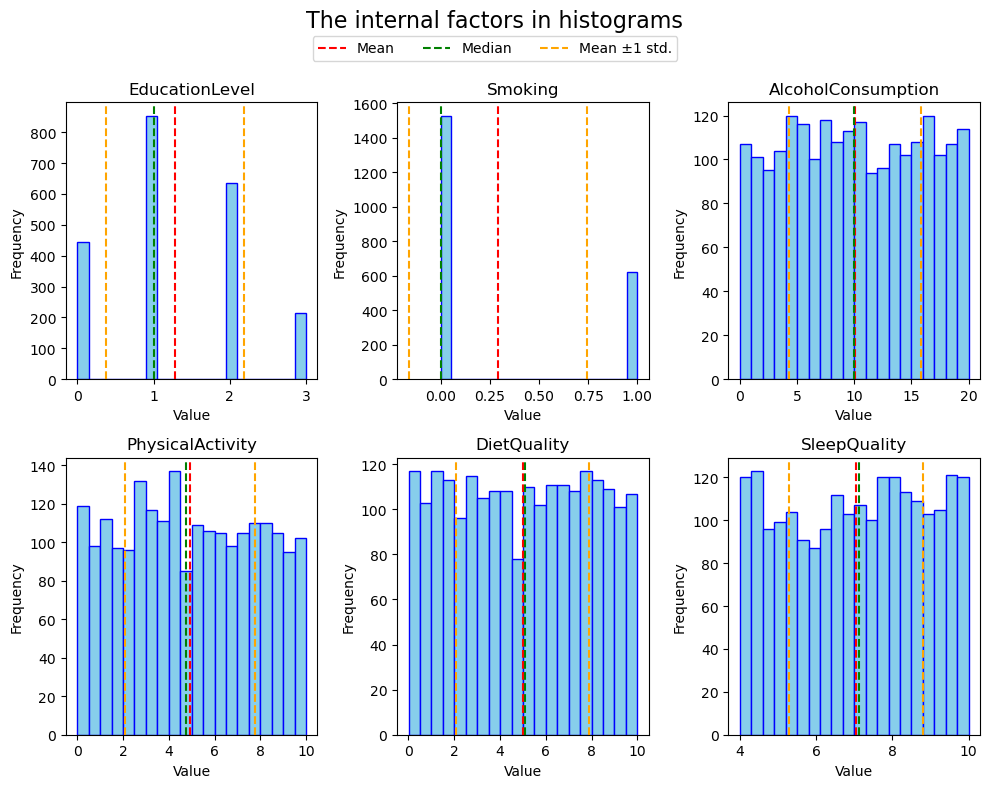

In [24]:
# Plot the internal factors into an image with two columns
num_plots = len(external_factors)
columns = 3
rows = (num_plots + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(10, rows * 4))
fig.suptitle('The internal factors in histograms', fontsize=16)
axes = axes.flatten()

mean_line = Line2D([0], [0], color='red', linestyle='dashed', label='Mean')
median_line = Line2D([0], [0], color='green', linestyle='dashed', label='Median')
std_line = Line2D([0], [0], color='orange', linestyle='dashed', label='Mean ±1 std.')

for i, (key, values) in enumerate(external_factors.items()):
    axes[i].hist(values, bins=20, color='skyblue', edgecolor='blue')
    mean = np.mean(values)
    std = np.std(values)
    median = np.median(values)

    axes[i].axvline(mean, color='red', linestyle='dashed')
    axes[i].axvline(median, color='green', linestyle='dashed')
    axes[i].axvline(mean + std, color='orange', linestyle='dashed')
    axes[i].axvline(mean - std, color='orange', linestyle='dashed')

    axes[i].set_title(key)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.legend(handles=[mean_line, median_line, std_line], loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 0.955))

plt.tight_layout(rect=[0, 0, 1, 0.955])
plt.show()

### Findings
There are a few columns that seem to follow just a few categories:
- Internal factors: `Gender`, `Ethnicity`, `FamilyHistoryAlzheimers`,
`CardiovascularDisease`, `Diabetes`, `Depression`, `Hypertension`,
`MemoryComplaints`, `BehavioralProblems`, `Confusion`, `Disorientation`,
`PersonalityChanges`, `DifficultyCompletingTasks`, `Forgetfulness` and
`HeadInjury`
- External factors: `EducationLevel` and `Smoking`

Out of these, `Ethnicity` and `EducationLevel` have more than two categories,
while the other ones only have two. Something that stands out in the columns
with only two categories, is that usually the 'No' bar (corresponding to
value 0) is much larger than the 'Yes' bar (corresponding to value 1). The only
categorical data where this is not the case is the `Gender` column, which shows
that the two genders are represented roughly equally. A next step for cleaning
the columns mentioned above is to attach a more meaningful label to the numbers.

For all colums that do not follow a few categories we see that the median and
mean are roughly at the same value. Besides that, none of the columns seem to
follow some sort of distribution. However, it also does not seem like each
symptom is uniformly distributed among the population.

In [41]:
# Attach the correct labels to categorical data columns
yesno_cols = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
              'Depression', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
              'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
              'Forgetfulness', 'HeadInjury', 'Smoking']
labeled_data = {}
for key in yesno_cols:
    labeled_data[key] = np.where(
        np.array(data[key]) == 0, 'no', 'yes').tolist()
labeled_data['Gender'] = np.where(
    np.array(data['Gender']) == 0, 'male', 'female').tolist()
mapping = {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"}
labeled_data['Ethnicity'] = np.vectorize(
    mapping.get)(data['Ethnicity']).tolist()
mapping = {0: "none", 1: "high school", 2: "bachelor", 3: "higher"}
labeled_data['EducationLevel'] = np.vectorize(
    mapping.get)(data['EducationLevel']).tolist()

for key in labeled_data.keys():
    print(f'{key}: {labeled_data[key][:5] + ['...']}')

FamilyHistoryAlzheimers: ['no', 'no', 'yes', 'no', 'no', '...']
CardiovascularDisease: ['no', 'no', 'no', 'no', 'no', '...']
Diabetes: ['yes', 'no', 'no', 'no', 'no', '...']
Depression: ['yes', 'no', 'no', 'no', 'no', '...']
Hypertension: ['no', 'no', 'no', 'no', 'no', '...']
MemoryComplaints: ['no', 'no', 'no', 'no', 'no', '...']
BehavioralProblems: ['no', 'no', 'no', 'yes', 'no', '...']
Confusion: ['no', 'no', 'no', 'no', 'no', '...']
Disorientation: ['no', 'no', 'yes', 'no', 'no', '...']
PersonalityChanges: ['no', 'no', 'no', 'no', 'yes', '...']
DifficultyCompletingTasks: ['yes', 'no', 'yes', 'no', 'yes', '...']
Forgetfulness: ['no', 'yes', 'no', 'no', 'no', '...']
HeadInjury: ['no', 'no', 'no', 'no', 'no', '...']
Smoking: ['no', 'no', 'no', 'yes', 'no', '...']
Gender: ['male', 'male', 'male', 'female', 'male', '...']
Ethnicity: ['Caucasian', 'Caucasian', 'Other', 'Caucasian', 'Caucasian', '...']
EducationLevel: ['bachelor', 'none', 'high school', 'high school', 'none', '...']


### Possible next steps:
- Use boxplots to find outliers (although it does not seem like there are any)
- Try to find correlations between numerical columns
- Try to find relationships between categorical columns and numerical ones

In [5]:
def detect_outliers(data):
    """
    Detect outliers in numerical columns using the Interquartile Range (IQR) method.
    """
    outliers = {}
    
    # Identify numerical columns
    numerical_columns = [
        col for col in data.keys() 
        if all(isinstance(x, (int, float)) for x in data[col])
    ]
    
    for column in numerical_columns:
        # Calculate Q1, Q3, and IQR
        values = data[column]
        Q1 = np.percentile(values, 25)
        Q3 = np.percentile(values, 75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        column_outliers = [
            (i, val) for i, val in enumerate(values) 
            if val < lower_bound or val > upper_bound
        ]
        
        outliers[column] = {
            'outliers': column_outliers,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'total_outliers': len(column_outliers),
            'outlier_percentage': (len(column_outliers) / len(values)) * 100
        }
    
    return outliers

def visualize_outliers(data, outliers):
    """
    Create box plots to visualize outliers in numerical columns.
    """

    numerical_columns = [
        col for col in data.keys() 
        if all(isinstance(x, (int, float)) for x in data[col])
    ]
    
    plt.figure(figsize=(15, 6))
    plt.title('Outliers in Numerical Columns', fontsize=16)
    sns.boxplot(data=[data[col] for col in numerical_columns])
    plt.xticks(range(len(numerical_columns)), numerical_columns, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def print_outlier_summary(outliers):
    """
    Print a summary of outliers for each numerical column.
    """
    print("\nOutlier Detection Summary:")
    for column, info in outliers.items():
        print(f"\n{column}:")
        print(f"  Total Outliers: {info['total_outliers']}")
        print(f"  Percentage of Outliers: {info['outlier_percentage']:.2f}%")
        print(f"  Lower Bound: {info['lower_bound']}")
        print(f"  Upper Bound: {info['upper_bound']}")
        
        # Print first 5 outliers if any exist
        if info['outliers']:
            print("  Sample Outliers (index, value):")
            for idx, (i, val) in enumerate(info['outliers'][:5]):
                print(f"    {i}: {val}")
            if len(info['outliers']) > 5:
                print(f"    ... and {len(info['outliers']) - 5} more")


Outlier Detection Summary:

PatientID:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: 3677.0
  Upper Bound: 7973.0

Age:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: 43.0
  Upper Bound: 107.0

Gender:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -1.5
  Upper Bound: 2.5

Ethnicity:
  Total Outliers: 211
  Percentage of Outliers: 9.82%
  Lower Bound: -1.5
  Upper Bound: 2.5
  Sample Outliers (index, value):
    2: 3
    6: 3
    10: 3
    31: 3
    47: 3
    ... and 206 more

EducationLevel:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -0.5
  Upper Bound: 3.5

BMI:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: 3.223853202798761
  Upper Bound: 52.257332438089264

Smoking:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -1.5
  Upper Bound: 2.5

AlcoholConsumption:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: -9.887371948487203
  Upper Bound: 3

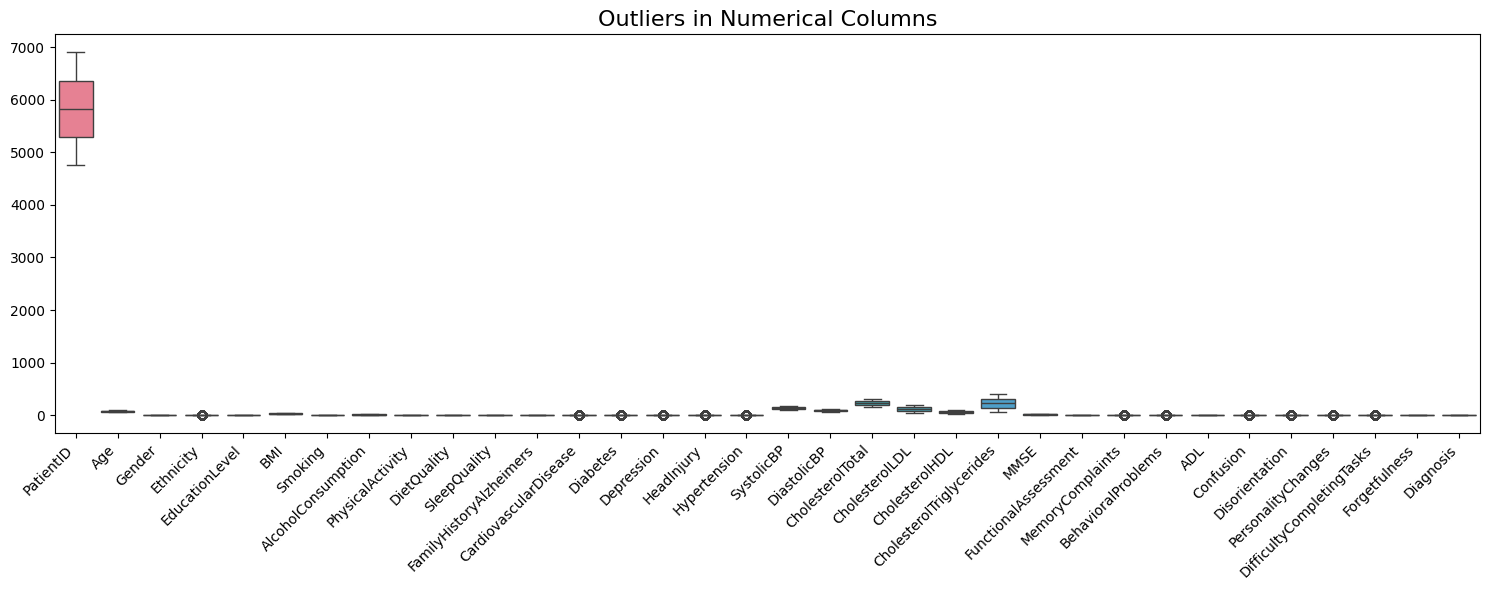

In [7]:
outliers = detect_outliers(data)
print_outlier_summary(outliers)
visualize_outliers(data, outliers)

We checked for correlations between numerical variables, using a heatmap.  

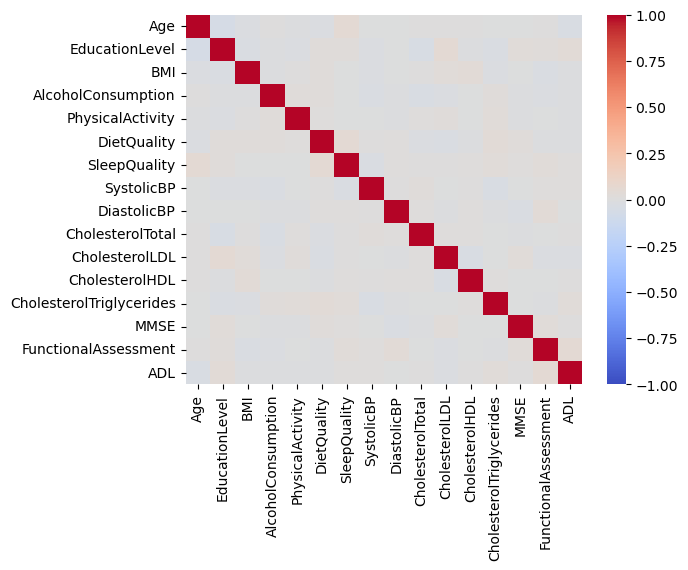

In [ ]:
# correlations between numerical columns 

import pandas as pd 

df = pd.DataFrame(data)

numerical_variables = ['Age', 'EducationLevel', 'BMI','AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

correlation_matrix = df[numerical_variables].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.show() 

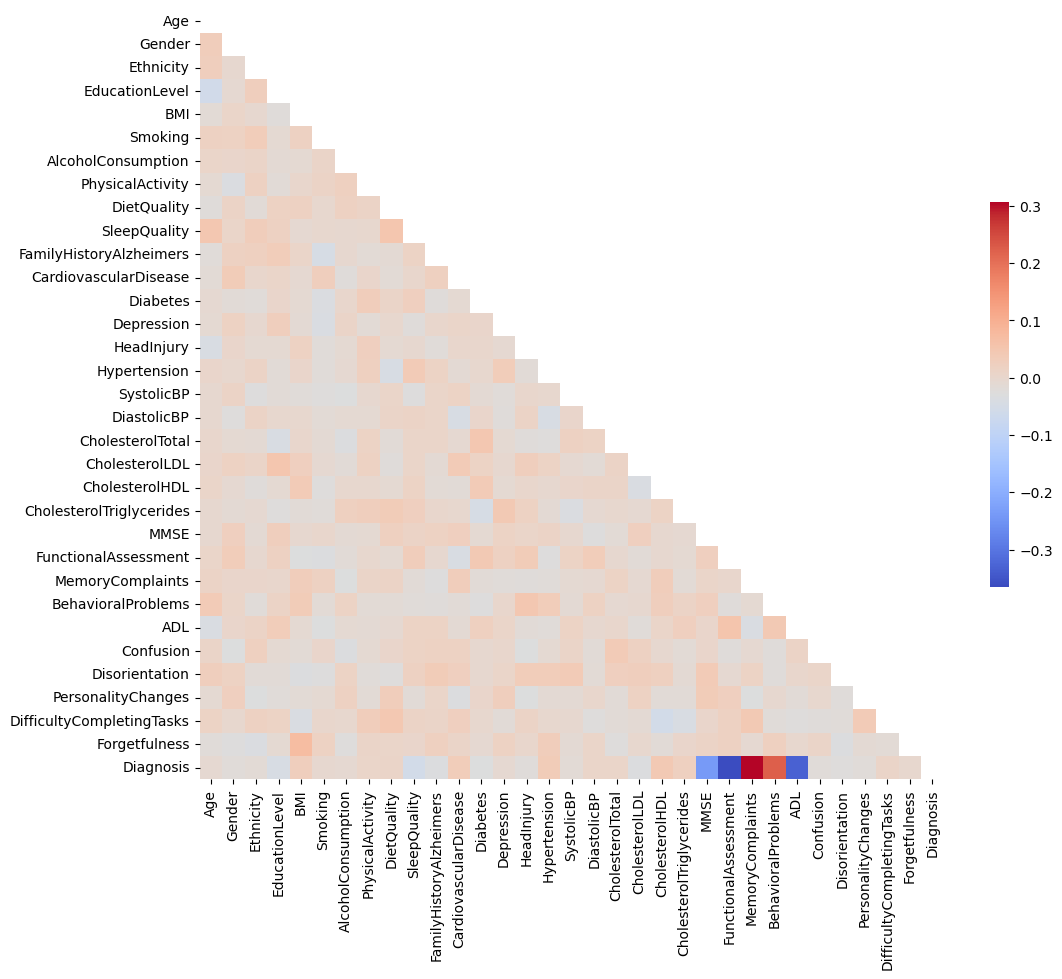

In [46]:
# alternate plot of the heatmap 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)
plt.show()

We checked if there is a quadratic fit in the data. For example, very low or very high bloop pressure has negative health outcomes - perhaps there are similimar curvilinear relationships with the cholestrol variables.

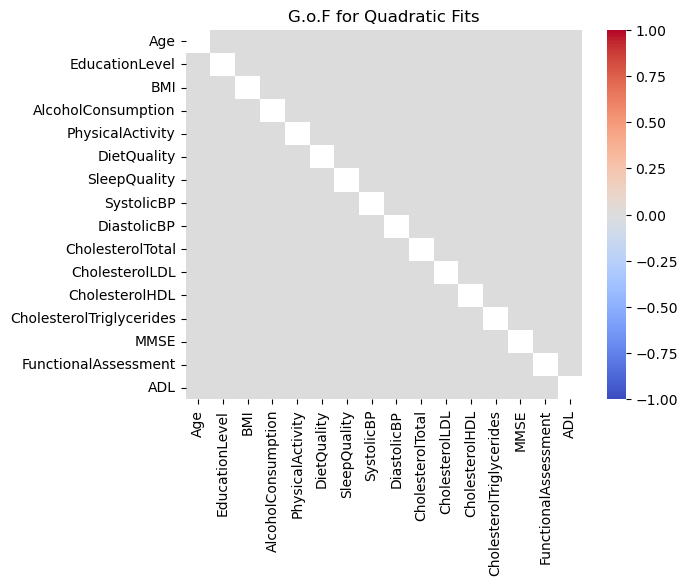

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_matrix = pd.DataFrame(index=numerical_variables, columns=numerical_variables)

# Polynomial feature transformation - quadratic
poly = PolynomialFeatures(degree=2)

# fit quadratic models and calculate R^2
for col1 in numerical_variables:
    for col2 in numerical_variables:
        if col1 != col2:
            X = df[[col1]]
            y = df[col2]
            X_poly = poly.fit_transform(X)
            model = LinearRegression().fit(X_poly, y)
            y_pred = model.predict(X_poly)
            r2 = r2_score(y, y_pred)
            r2_matrix.loc[col1, col2] = r2

r2_matrix = r2_matrix.apply(pd.to_numeric)
sns.heatmap(r2_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('G.o.F for Quadratic Fits')
plt.show()

No quadratic relationships between any two variables were found. 

Diagnosis rates for different variables, grouped by ethnicity (?) 

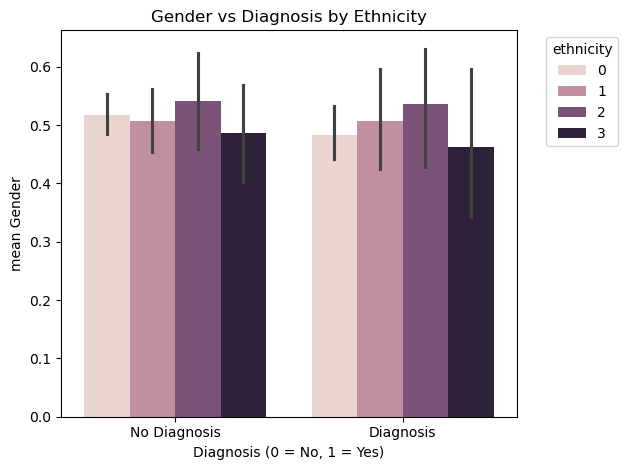

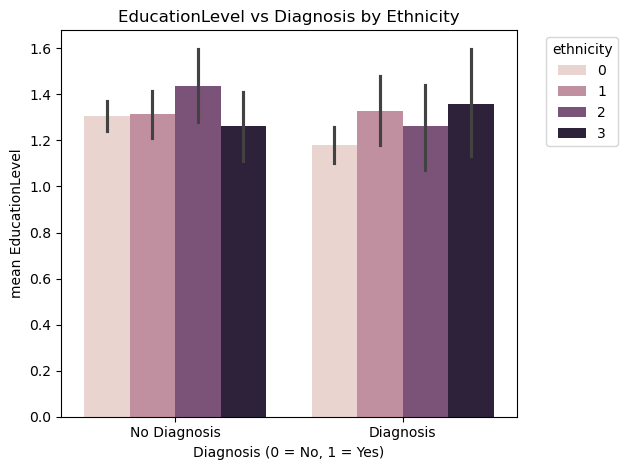

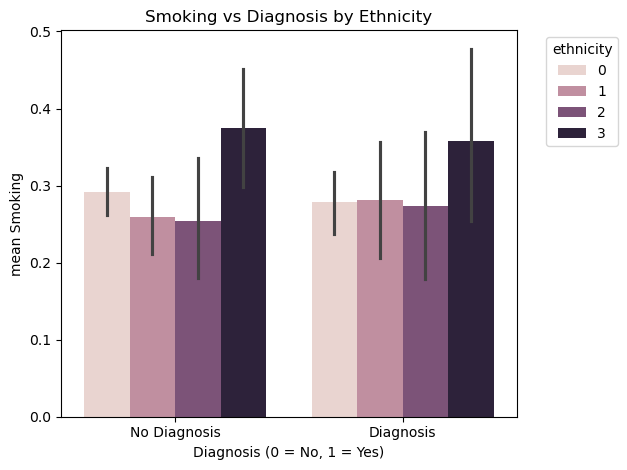

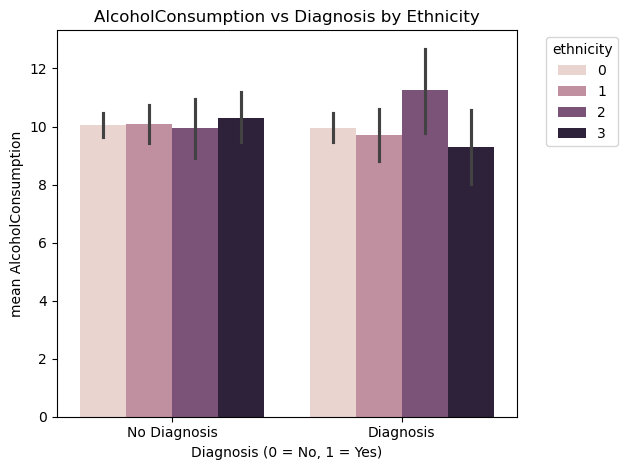

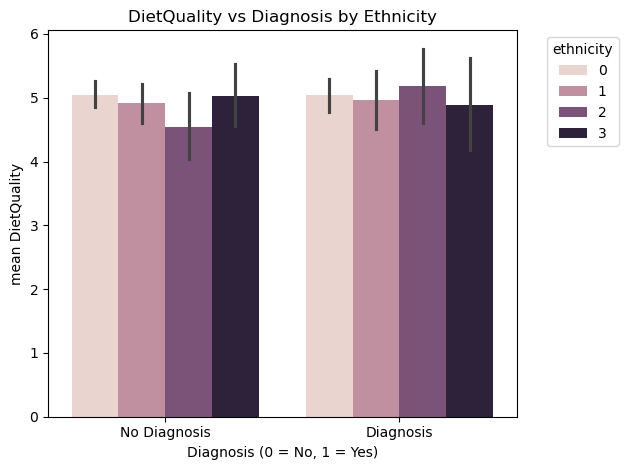

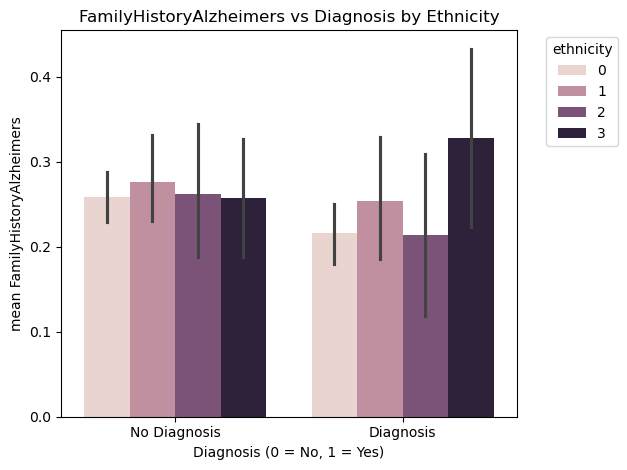

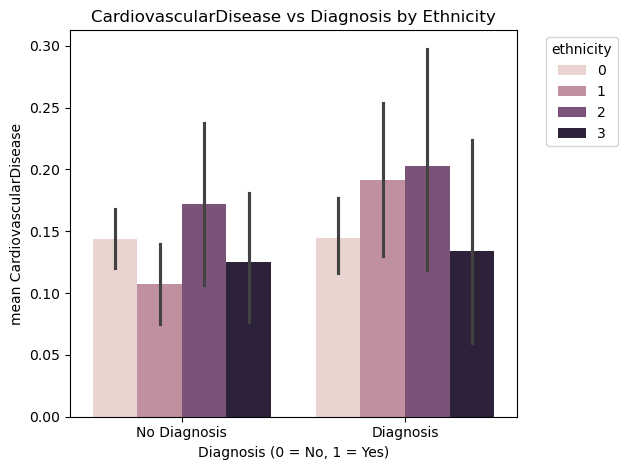

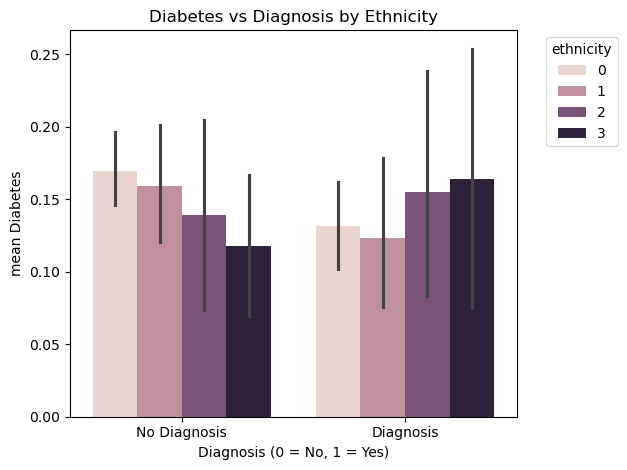

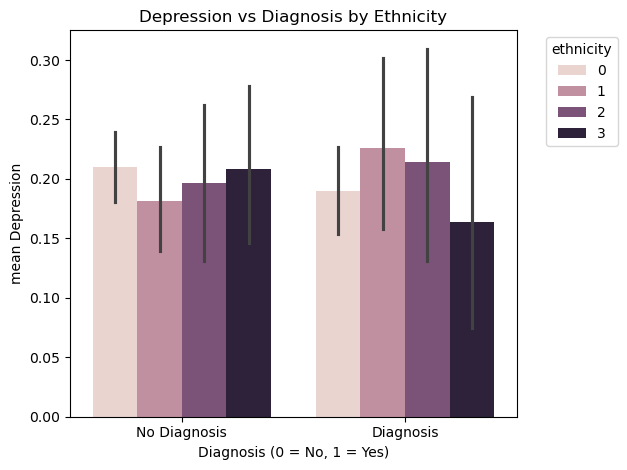

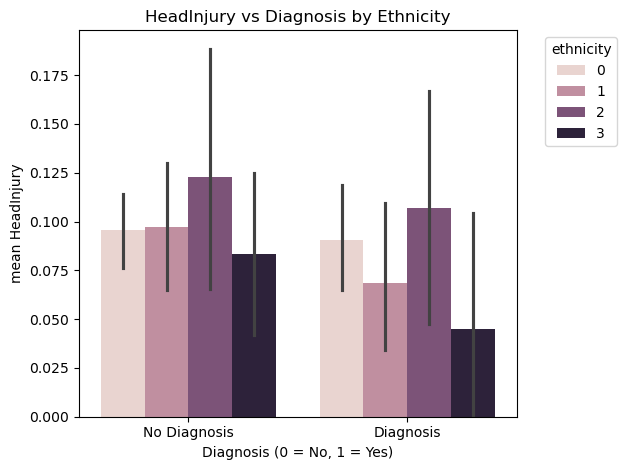

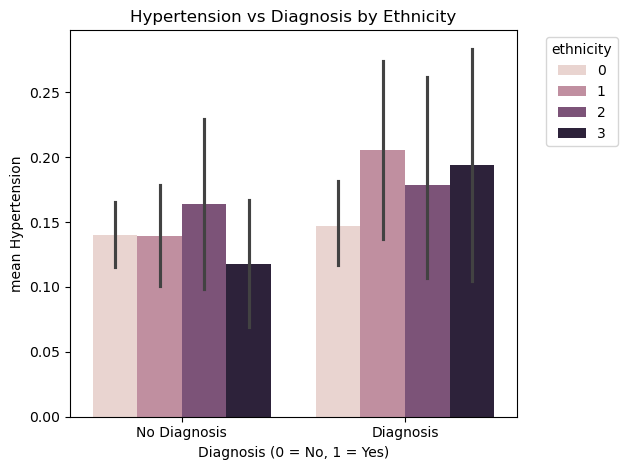

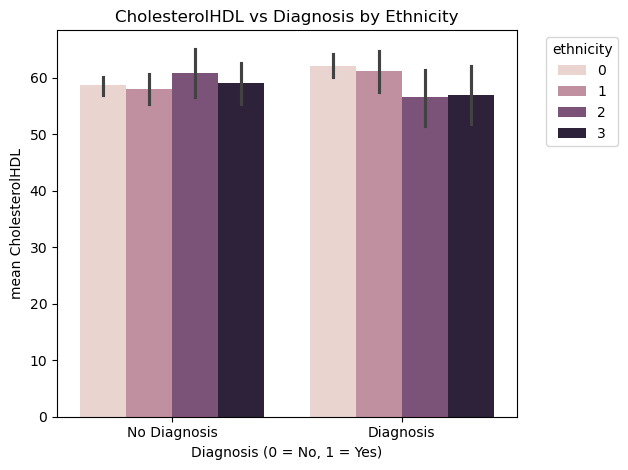

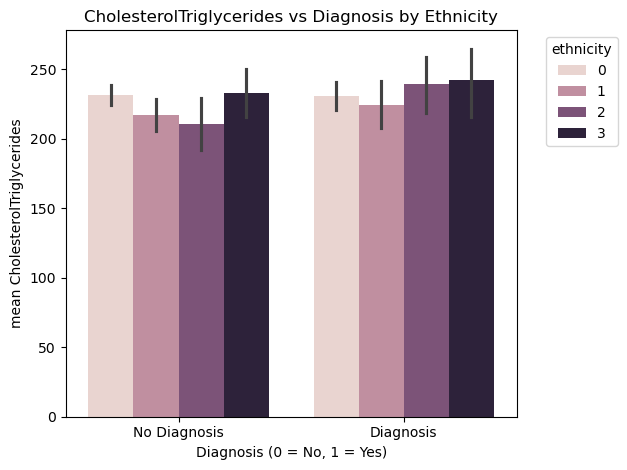

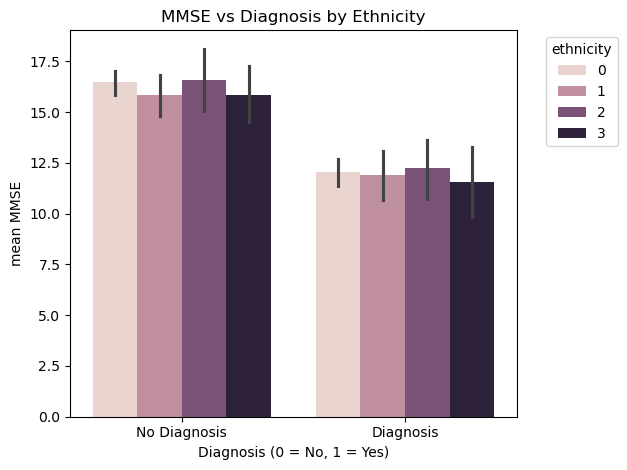

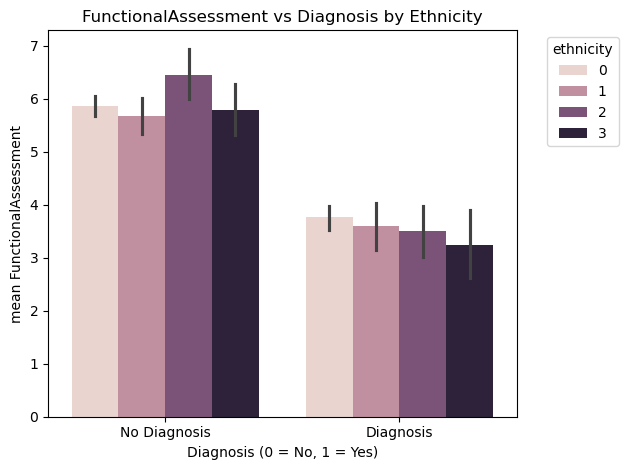

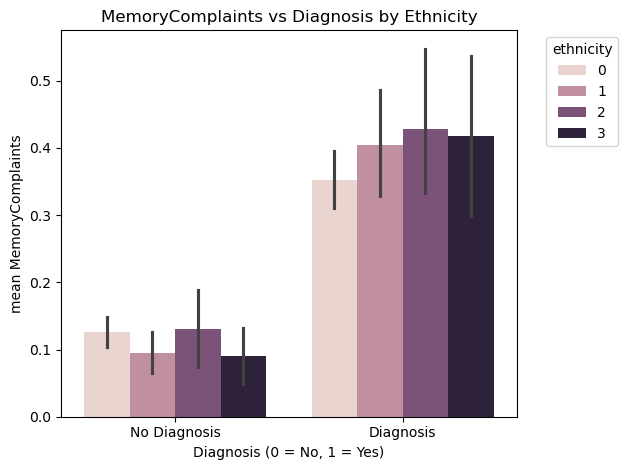

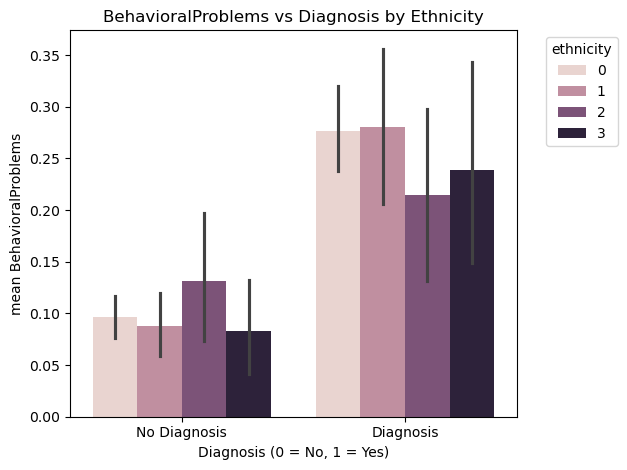

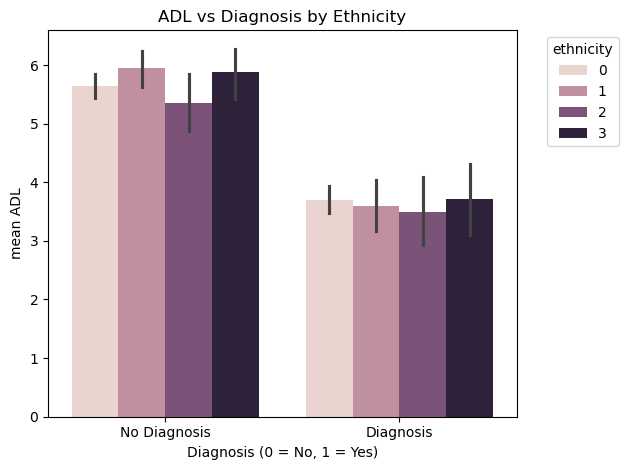

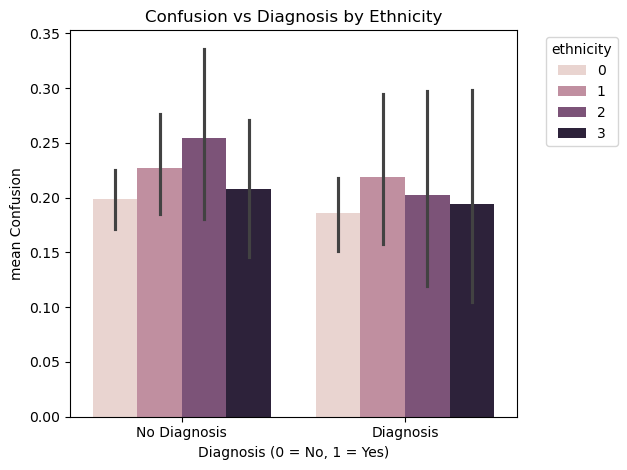

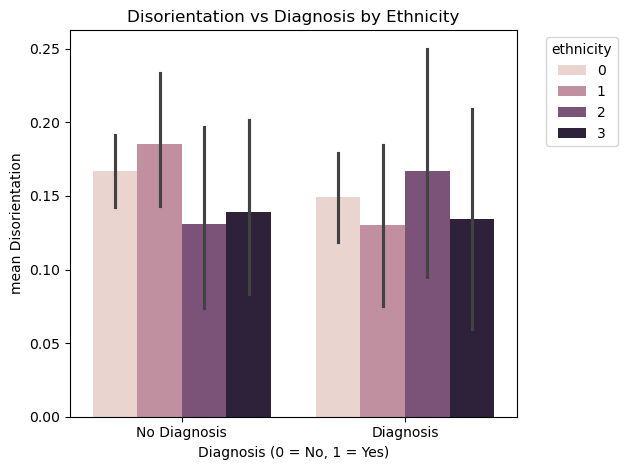

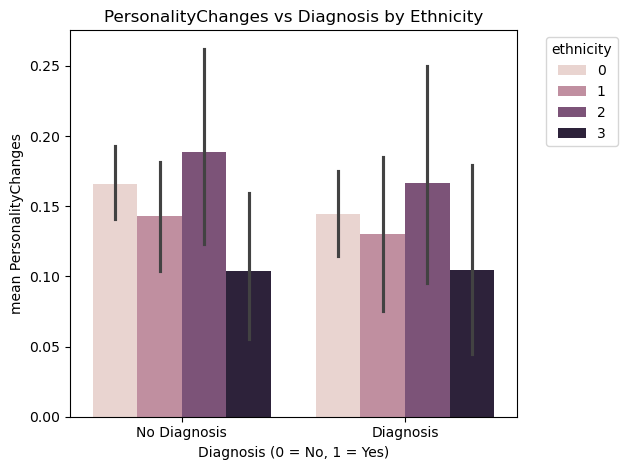

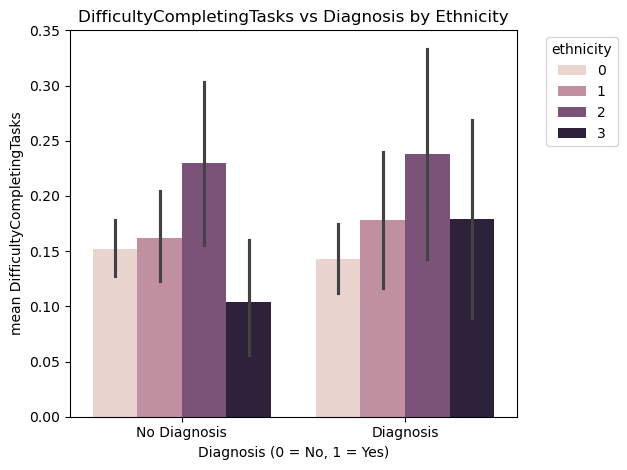

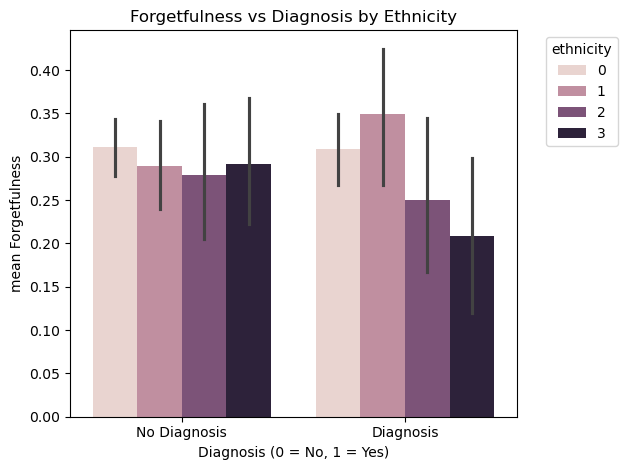

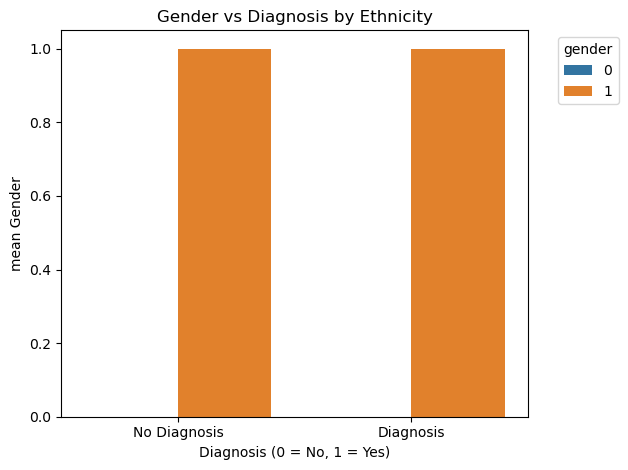

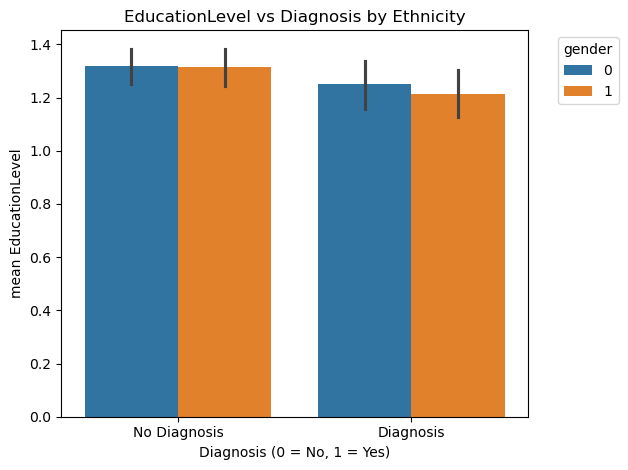

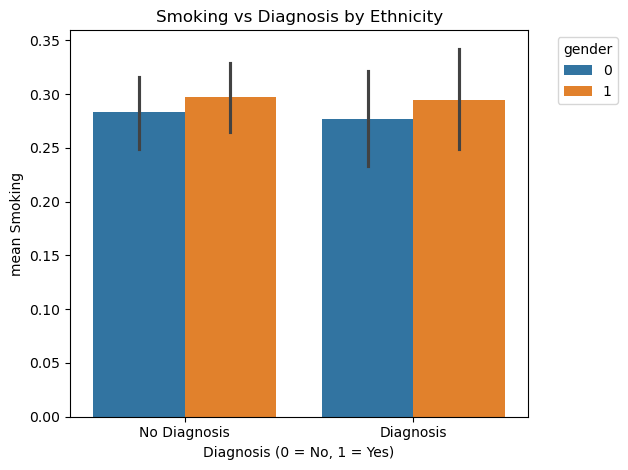

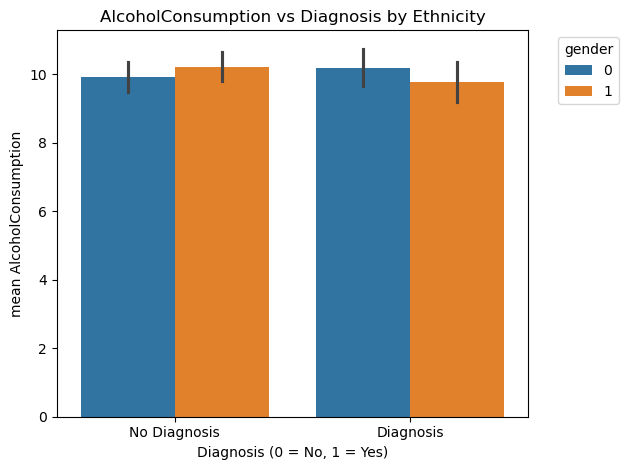

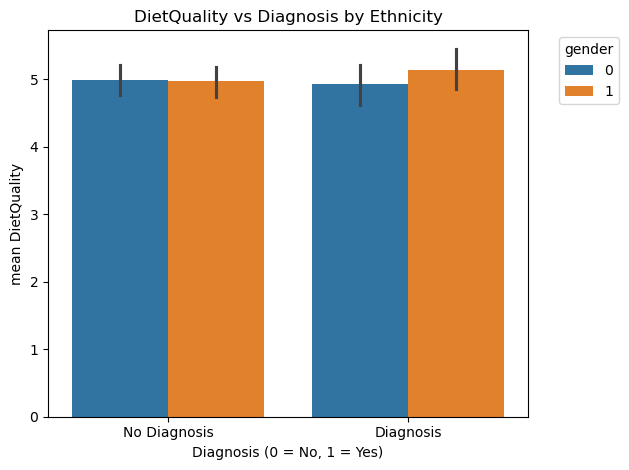

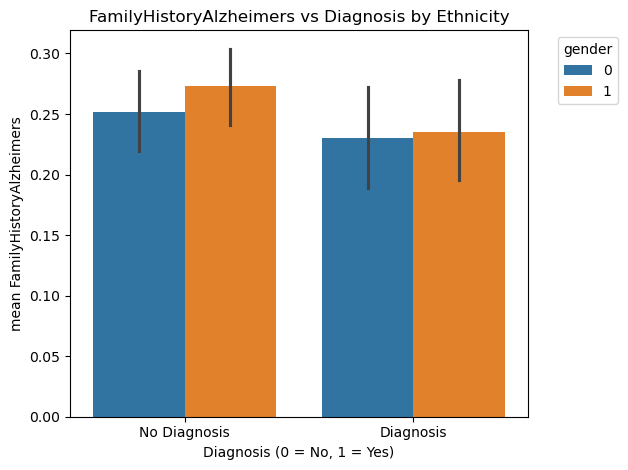

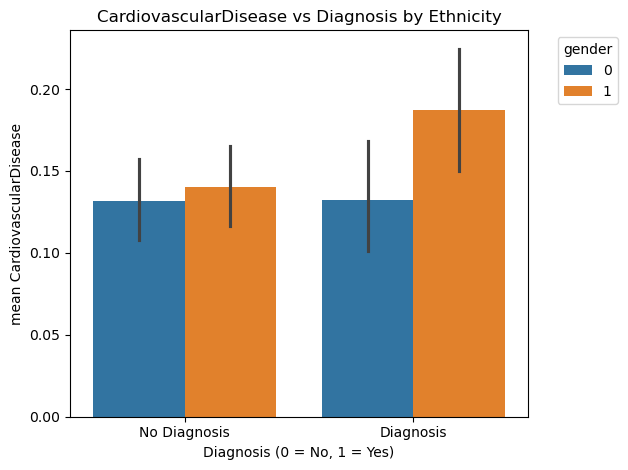

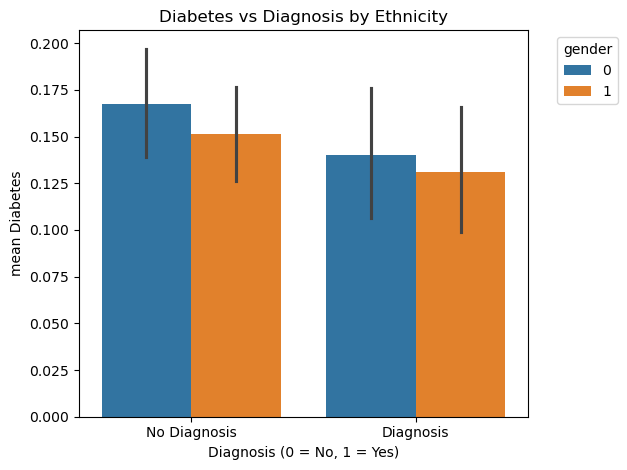

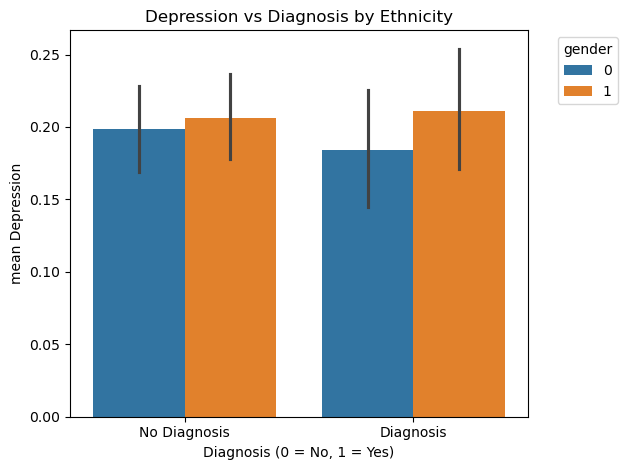

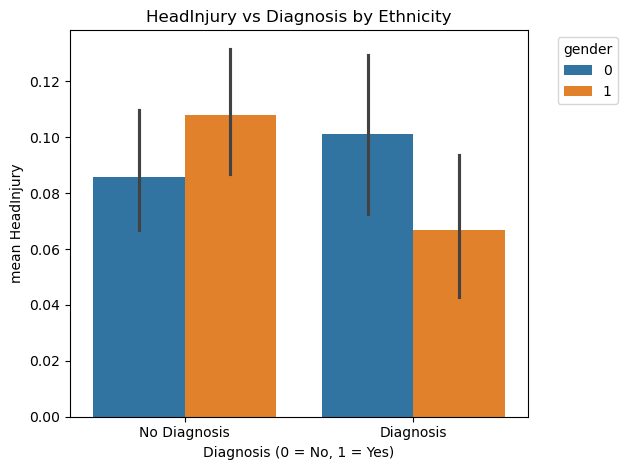

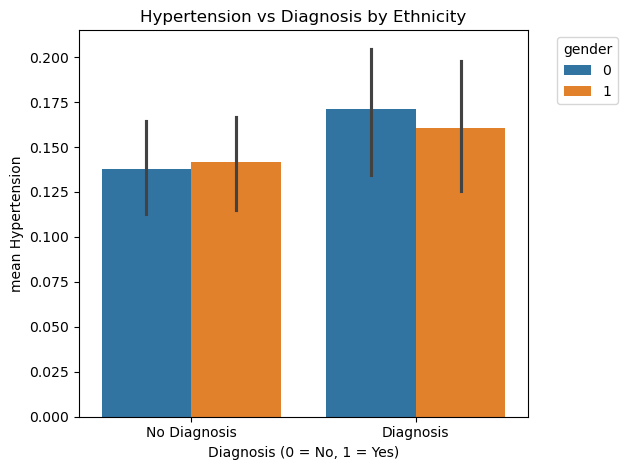

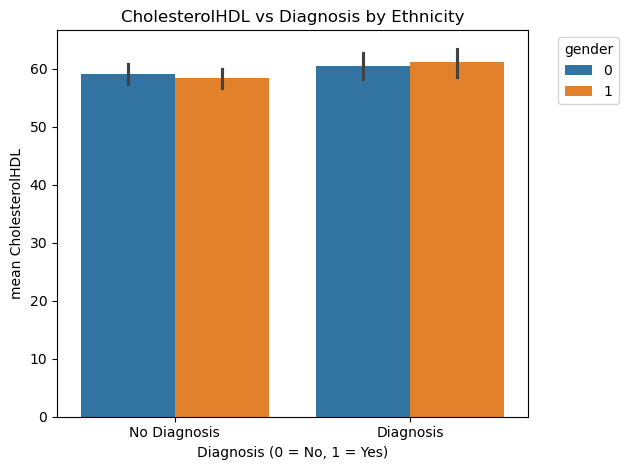

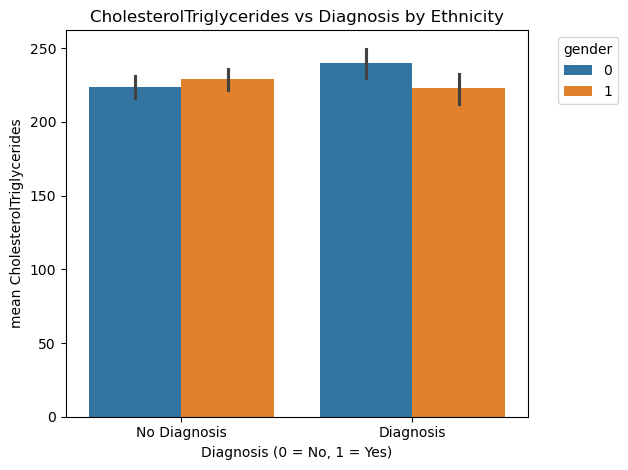

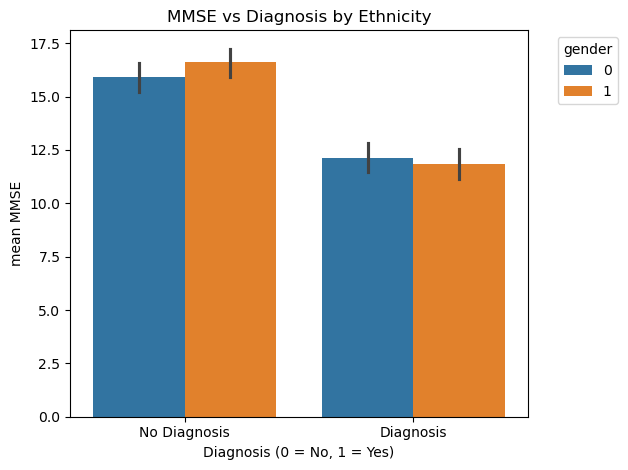

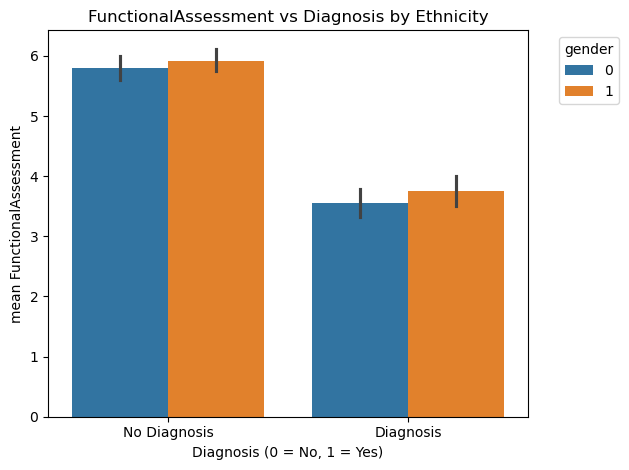

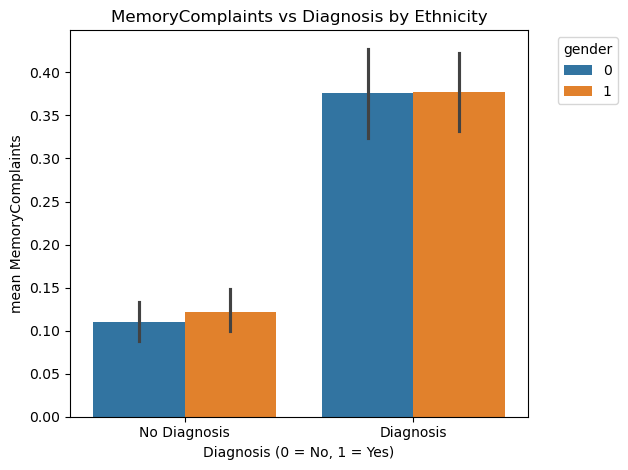

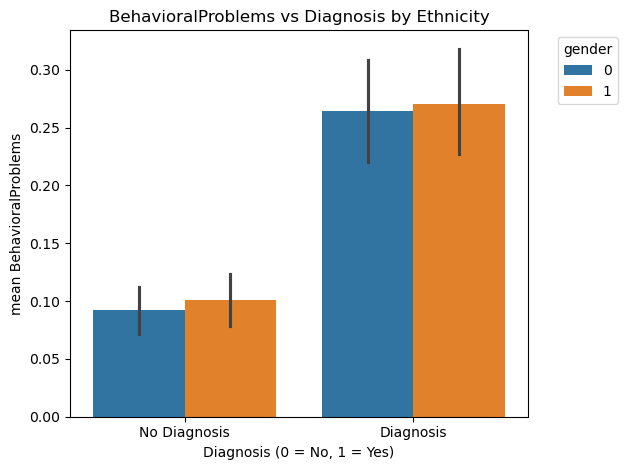

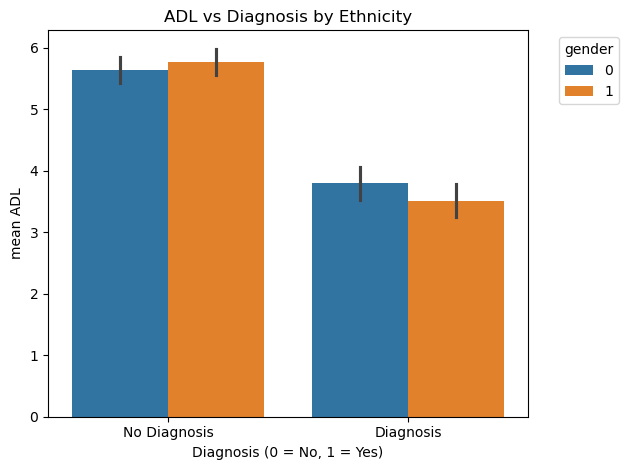

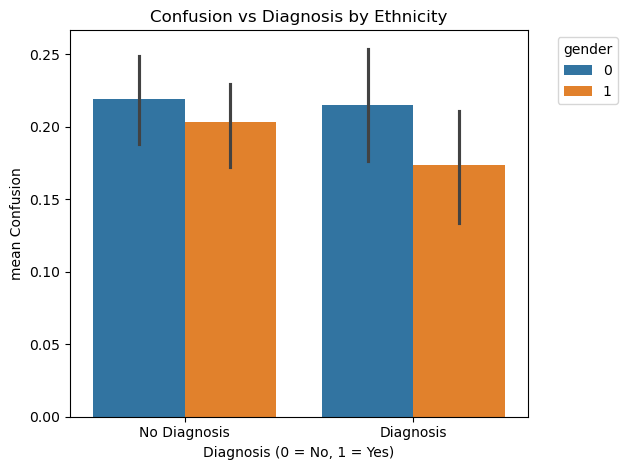

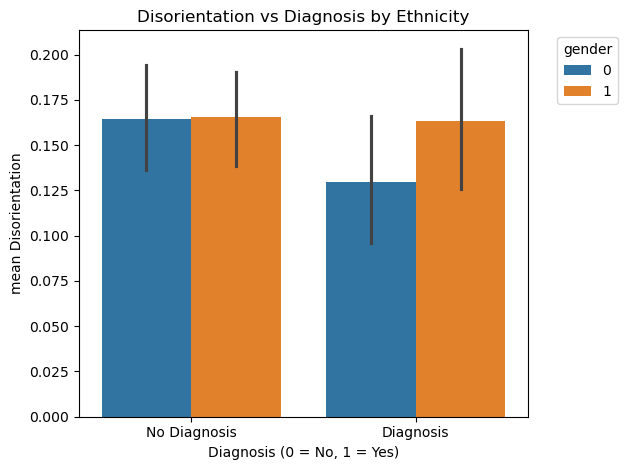

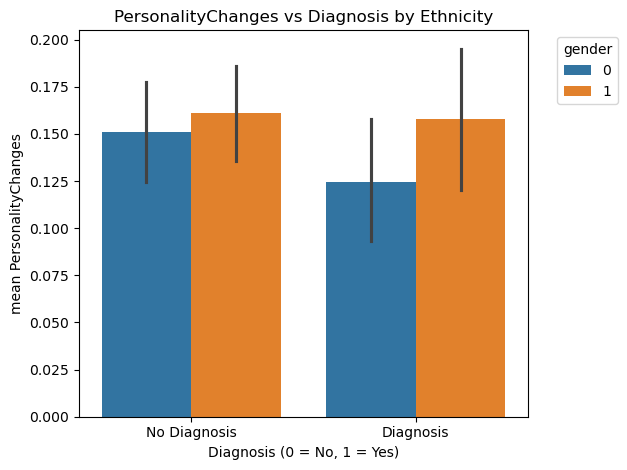

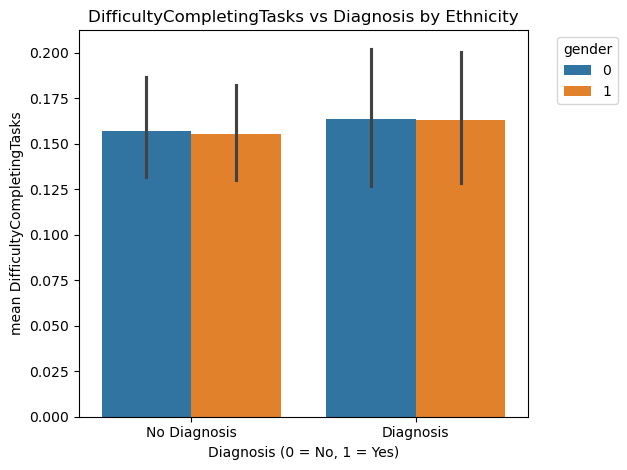

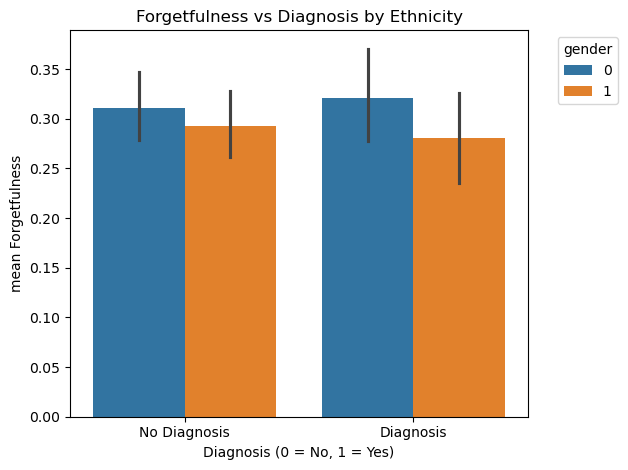

In [ ]:
df = pd.DataFrame(data)

# ethnicity 
for var in df.columns: 
    sns.barplot(x='Diagnosis', y=var, hue='Ethnicity', data=df)
    plt.title(f'{var} vs Diagnosis by Ethnicity')
    plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
    plt.ylabel(f'mean {var}')
    plt.xticks(ticks=[0, 1], labels=['No Diagnosis', 'Diagnosis'])
    plt.legend(title='ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# gender 
for var in df.columns: 
    sns.barplot(x='Diagnosis', y=var, hue='Gender', data=df)
    plt.title(f'{var} vs Diagnosis by Ethnicity')
    plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
    plt.ylabel(f'mean {var}')
    plt.xticks(ticks=[0, 1], labels=['No Diagnosis', 'Diagnosis'])
    plt.legend(title='gender', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
# ASSUMPTION CHECK FOR LOGISTIC REGRESSION 

'''
ASSUMPTIONS OF THE LOGISTIC REGRESSION MODEL

1. Binary dependent variable 
2. No multicollinearity
3. Linearity of the logit
'''

# 1. Binary dependent variable
def is_binary(df, target_column):
    unique_values = df[target_column].unique()
    if len(unique_values) == 2:
        return True

if is_binary(df, 'Diagnosis'): print("binary DV assumption: PASSED") 
else : print("binary DV assumption: FAILED")


# 2. no multicollinearity (correlations between predictors) 
''' 
VIF (Variance Inflation Factor) indicates how much a predictor is influenced by the other predictors by measuring 
how much the variability of a regression coefficient is increased due to correlation with other predictors. 
High VIF (>10) suggests that a predictor is highly correlated with others, which can make the model unstable or unreliable.

* the import from statsmodels could be replaced by calculating VIF as 1 / 1 - r_squared
''' 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_multicollinearity(df, predictor_columns):
    corr_matrix = df[predictor_columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()
    vif_data = pd.DataFrame()
    vif_data['Feature'] = predictor_columns
    vif_data['VIF'] = [variance_inflation_factor(df[predictor_columns].values, i) for i in range(len(predictor_columns))]
    return corr_matrix, vif_data 

# can edit this list to include whatever variables we keep in the final analysis 
predictor_columns = ['DietQuality', 'CholesterolHDL', 'Ethnicity'] 
corr_matrix, vif_data = check_multicollinearity(df, predictor_columns)

# No missing values, and correlations < 0.9
if corr_matrix.isnull().sum().sum() == 0 and (abs(corr_matrix) < 0.9).all().all():  
    print("Multicollinearity: PASSED")
else: print("Multicollinearity: FAILED")


'''
The linearity of the logit assumption: each predictor should have a linear relationship with the log odds of the DV.
Non-linearity can lead to biased results.
'''

def check_linearity(df, predictor_columns, DV):

    linearity_results = {}

    for col in predictor_columns:

        X = sm.add_constant(df[col])  
        model = sm.Logit(df[DV], X).fit()
        linearity_results[col] = model.summary()

        # plotting partial residuals
        plt.scatter(df[col], model.fittedvalues)
        plt.title(f"Partial residuals for {col}")
        plt.xlabel(col)
        plt.ylabel('Fitted values')
        plt.show()

    return linearity_results

linearity_results = check_linearity(df, predictor_columns, 'Diagnosis')
for col, result in linearity_results.items():
    print(f" For {col}: Linearity assumption - PASSED")
